In [12]:
import sys
sys.path.insert(0, './../Libs/')
import numpy as np
import BasisFunction as bf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [6]:
class Generator_2D:
    def __init__(self, function, xRange):
        self.x = np.linspace(xRange[0], xRange[1], xRange[2]).reshape(-1, 1)
        self.y = function(self.x)
        self.function = function
        self.xRange = xRange

    def plot(self, label = None, newFig = False, figsize=(8, 6)):
        if newFig:
            plt.figure(figsize = figsize)
        plt.plot(self.x.ravel(), self.y.ravel(), label = label)
        plt.xlim(xRange[0], xRange[1])
        plt.legend()
        return self
        
    def generateNoisyPoints(self, N, seed = 0, sigma = 0.1):
        np.random.seed(seed)
        xgen = np.random.uniform(self.xRange[0], self.xRange[1], N).reshape(-1, 1)
        ynoise = np.random.normal(0, np.sqrt(sigma), N).reshape(-1, 1)
        ygen = self.function(xgen) + ynoise
        return (xgen, ygen)

In [7]:
NTrainPoints = 50
NTestPoints = 20
Nsigma = 0.1

xRange = (0, 2*np.pi, 500)
# func = lambda x: 1/(1 - np.exp(-x) + 0.0000001)
# func = lambda x: np.add(2*x, 3*np.sin(x))
func = lambda x: np.sin(x)
basisFuncs = [
    lambda x: x,
    lambda x: np.power(x, 2),
    lambda x: np.power(x, 3),
    lambda x: np.power(x, 4),
    lambda x: np.power(x, 5),
#     lambda x: np.power(x, 6),
#     lambda x: np.power(x, 7),
#     lambda x: np.power(x, 8),
#     lambda x: np.power(x, 9),
#     lambda x: np.power(x, 10),
]

0.8352219514727703
0.8352408040781896


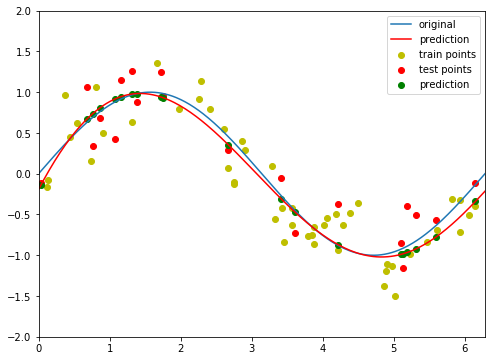

In [9]:
sinGen = Generator_2D(func, xRange).plot(label = "original", newFig = True)

xgen, ygen = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
plt.scatter(xgen, ygen, c = 'y', label = "train points")

xtest, ytest = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)
plt.scatter(xtest, ytest, c = 'r', label = "test points")

Xfeatures = bf.BaseBasicFunction(xgen, basisFuncs).generate()
XfeaturesTest = bf.BaseBasicFunction(xtest, basisFuncs).generate()
lr = LinearRegression().fit(Xfeatures, ygen)
print(lr.score(Xfeatures, ygen))
print(lr.score(XfeaturesTest, ytest))

ypred_test = lr.predict(XfeaturesTest)
plt.scatter(xtest, ypred_test, c = 'g', label = "prediction")

xPredictLine = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
yPredictLine = lr.predict(bf.BaseBasicFunction(xPredictLine, basisFuncs).generate())

plt.plot(xPredictLine.ravel(), yPredictLine.ravel(), label = "prediction", c = 'r')
plt.ylim(-2, 2)
plt.legend()

0.8290145006420483
0.8208382288997618


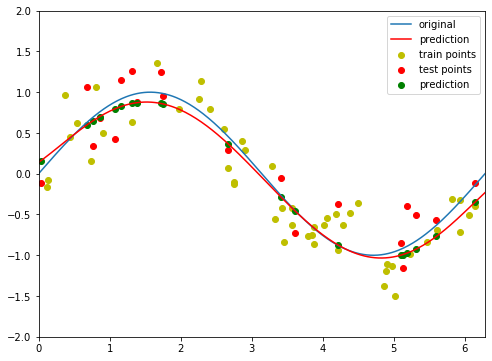

In [11]:
sinGen = Generator_2D(func, xRange).plot(label = "original", newFig = True)

xgen, ygen = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
plt.scatter(xgen, ygen, c = 'y', label = "train points")

xtest, ytest = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)
plt.scatter(xtest, ytest, c = 'r', label = "test points")

Xfeatures = bf.BaseBasicFunction(xgen, basisFuncs).generate()
XfeaturesTest = bf.BaseBasicFunction(xtest, basisFuncs).generate()
lr = Ridge(alpha = 0.5).fit(Xfeatures, ygen)
print(lr.score(Xfeatures, ygen))
print(lr.score(XfeaturesTest, ytest))

ypred_test = lr.predict(XfeaturesTest)
plt.scatter(xtest, ypred_test, c = 'g', label = "prediction")

xPredictLine = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
yPredictLine = lr.predict(bf.BaseBasicFunction(xPredictLine, basisFuncs).generate())

plt.plot(xPredictLine.ravel(), yPredictLine.ravel(), label = "prediction", c = 'r')
plt.ylim(-2, 2)
plt.legend()

0.7478788639940902
0.6681664719486466


/Users/tuantran/anaconda3/envs/p37env/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.246533514259201, tolerance: 0.002486834615927512
  positive)


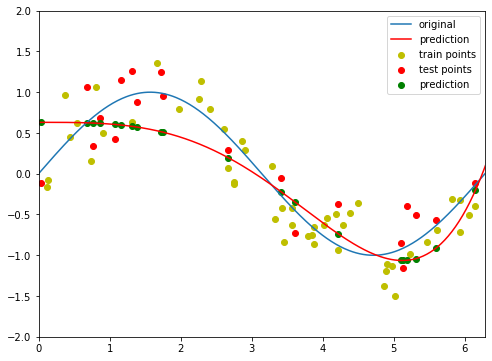

In [18]:
sinGen = Generator_2D(func, xRange).plot(label = "original", newFig = True)

xgen, ygen = sinGen.generateNoisyPoints(NTrainPoints, sigma = Nsigma)
plt.scatter(xgen, ygen, c = 'y', label = "train points")

xtest, ytest = sinGen.generateNoisyPoints(NTestPoints, sigma = Nsigma, seed = 100)
plt.scatter(xtest, ytest, c = 'r', label = "test points")

Xfeatures = bf.BaseBasicFunction(xgen, basisFuncs).generate()
XfeaturesTest = bf.BaseBasicFunction(xtest, basisFuncs).generate()
lr = Lasso(alpha = 0.5).fit(Xfeatures, ygen)
print(lr.score(Xfeatures, ygen))
print(lr.score(XfeaturesTest, ytest))

ypred_test = lr.predict(XfeaturesTest)
plt.scatter(xtest, ypred_test, c = 'g', label = "prediction")

xPredictLine = np.linspace(0, 4*np.pi, 500).reshape(-1, 1)
yPredictLine = lr.predict(bf.BaseBasicFunction(xPredictLine, basisFuncs).generate())

plt.plot(xPredictLine.ravel(), yPredictLine.ravel(), label = "prediction", c = 'r')
plt.ylim(-2, 2)
plt.legend()